# *_METODO DE DIFERENCIAS FINITAS 1D PARA PROBLEMAS ELIPTICOS_*

### Integrantes:
- Cloe Romero
- Benjamin Giacomini
- Daniela Díaz

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import math
from scipy.misc import derivative
import scipy
import timeit
import numpy as geek 
from sympy import * 

### Problema con Condiciones de Frontera Dirichlet

##### u''(x)=f(x), x \in [xinicial,xfinal], u(9)=u_\alpha, u(1)=u_\beta

In [2]:
#Algoritmo en general
##############################################################################

#Paso 1 Generar una malla homógenea al dominio
def malla(n,x0,xn):
    a=x0
    b=xn
    malla=np.linspace(a,b,n+1)
    h=(b-a)/n
    return malla,h

##############################################################################

#Paso 2 crear vector f_vector de la  función f(x_i), i=1,...,n-1 y matriz A

#import numpy as geek 
#from sympy import * 

#x=symbols('x')
#f_vector=[]
#for i in malla:
#    x=i
#    f= (remplace funcion)f_vector1

#    f_vector.append(f)
#Se construita la matriz A de n-1  x n-1
#A= zeros(n-1,n-1)
def Amatrix(dim):
    A= zeros(dim,dim)
    for i in range(0,dim):
        for j in range(0,dim):
            if i==j:
                A[i,j]=-2
            if i==j-1 or i==j+1:
                A[i,j]=1
    return np.array(A,dtype='float')

##############################################################################

#Paso 3 resolver el sistema h^(-2)Au=f ssi u=h^2A^(-1)u

def make_u(h,A,f,ui,uf):
    u=h**2*np.dot(np.linalg.inv(A),f)
    u=u.tolist()
    u.append(uf)
    u.reverse()
    u.append(ui)
    u.reverse()
    return u

##############################################################################

# Simulacion 1

*u''(x)=2picos(pi x),    x se mueve en  [-1,2], y(-1)=-1 y(2)=1**

**obs: notemos que la solución analitica del problema anterior viene dado por y(x)=(-2+4x-3cos(\pix))/3**

In [3]:
#paso 1
n1=5
xi1=-1
xf1=2
u0=-1
un=1
malla_1,h_1=malla(n1,xi1,xf1)

#paso 2

def function_example1(n,u0,un,h,malla):
    x=symbols('x')
    f_vector1=[]
    for i in malla[1:n]:
        x=i  
        f= (np.pi**2)*np.cos(np.pi*x)
        if i==malla[1]:
            f_vector1.append(f-(u0/(h**2)))
        elif i==malla[n-1]:
            f_vector1.append(f-(un/(h**2)))
        else:
            f_vector1.append(f)
    return f_vector1

f1_n20=function_example1(n1,u0,un,h_1,malla_1)
#Se construita la matriz A de n-1  x n-1

A= Amatrix(n1-1)

#paso 3

u1=make_u(h_1,A,f1_n20,u0,un)

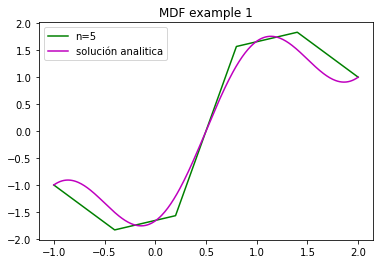

In [4]:
inter=np.linspace(xi1,xf1,300)
g_values=[]
for i in inter:
    x=i
    g=(-2+4*x-3*np.cos(np.pi*x))/3
    g_values.append(g)
plt.plot(malla_1,u1,c='g',label='n='+str(n1))
plt.plot(inter,g_values,c='m',label='solución analitica')
plt.legend()
plt.title('MDF example 1')
plt.show()

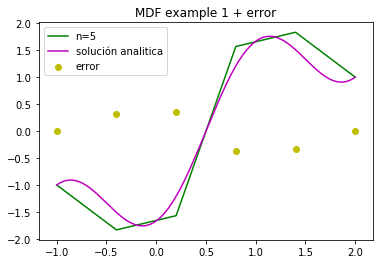

[0.0, 0.3246529045202524, 0.36036762784547305, -0.3603676278454744, -0.32465290452025264, 0.0]


In [5]:
def error_function(u,m):
    error=[]
    count=0
    for i in m:
        x=i
        g=(-2+4*x-3*np.cos(np.pi*x))/3
        error.append(g-u[count])
        count+=1
    return error
e1=error_function(u1,malla_1)

plt.plot(malla_1,u1,c='g',label='n='+str(n1))
plt.plot(inter,g_values,c='m',label='solución analitica')
plt.scatter(malla_1,e1,c='y',label='error')
plt.legend()
plt.title('MDF example 1 + error')
plt.show()

print(e1)

 Podemos ver como para n=5 la aproximación no es muy buena, a continaución veremos que pasa si aumentamos el valor de n

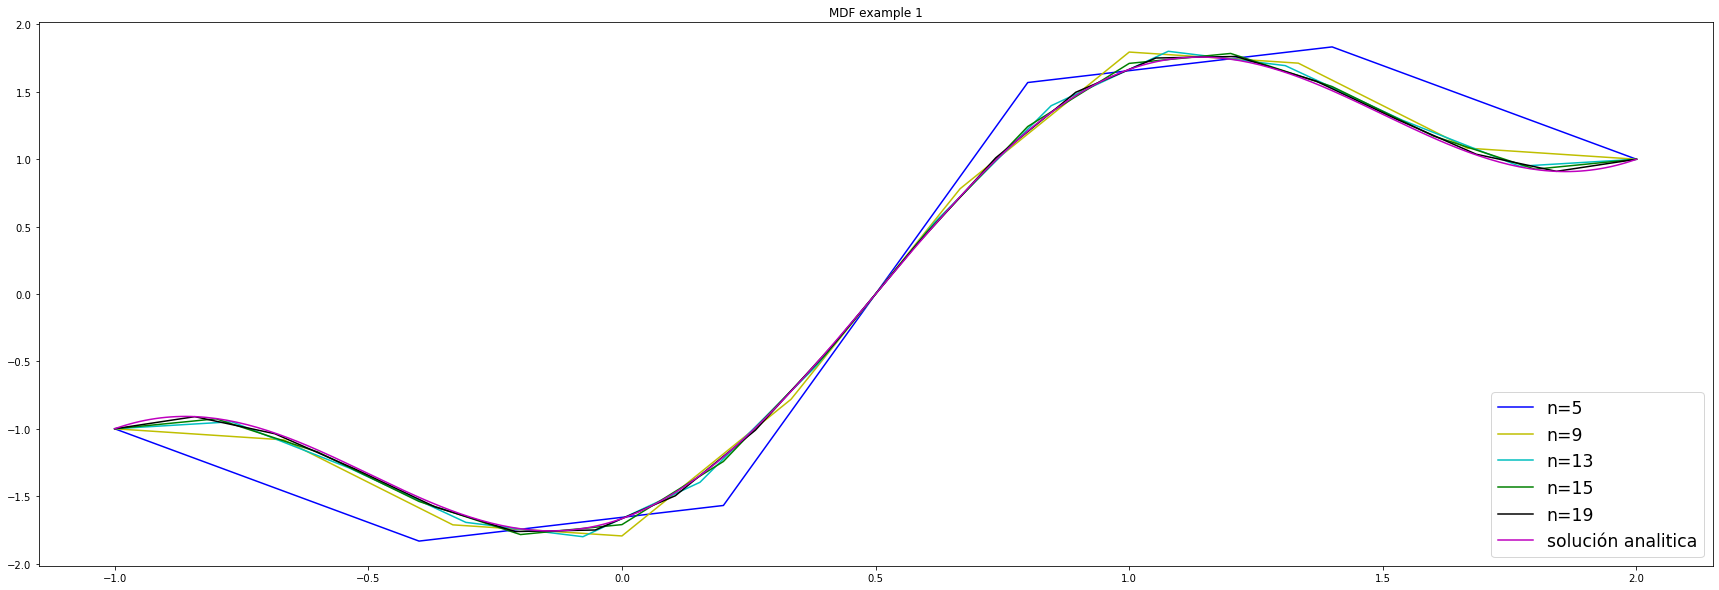

In [6]:
#forma manual de calcular varios u dependiendo del valor de n

plt.figure(figsize=(30,10)) 


n2=9
n3=13
n4=15
n5=19
malla_2,h_2=malla(n2,xi1,xf1)
malla_3,h_3=malla(n3,xi1,xf1)
malla_4,h_4=malla(n4,xi1,xf1)
malla_5,h_5=malla(n5,xi1,xf1)
f2=function_example1(n2,u0,un,h_2,malla_2)
f3=function_example1(n3,u0,un,h_3,malla_3)
f4=function_example1(n4,u0,un,h_4,malla_4)
f5=function_example1(n5,u0,un,h_5,malla_5)
A2= Amatrix(n2-1)
A3= Amatrix(n3-1)
A4= Amatrix(n4-1)
A5= Amatrix(n5-1)
u2=h_2**2 *np.dot(np.linalg.inv(A2),f2)
u3=h_3**2 *np.dot(np.linalg.inv(A3),f3)
u4=h_4**2 *np.dot(np.linalg.inv(A4),f4)
u5=h_5**2 *np.dot(np.linalg.inv(A5),f5)

u2=make_u(h_2,A2,f2,u0,un)
u3=make_u(h_3,A3,f3,u0,un)
u4=make_u(h_4,A4,f4,u0,un)
u5=make_u(h_5,A5,f5,u0,un)


plt.plot(malla_1,u1,c='b',label='n='+str(n1))
plt.plot(malla_2,u2,c='y',label='n='+str(n2))
plt.plot(malla_3,u3,c='c',label='n='+str(n3))
plt.plot(malla_4,u4,c='g',label='n='+str(n4))
plt.plot(malla_5,u5,c='k',label='n='+str(n5))

plt.plot(inter,g_values,c='m',label='solución analitica')
plt.legend(loc='lower right',fontsize='xx-large')
plt.title('MDF example 1')
plt.show()


para la malla de 8 nodos se tiene que los  errores son 
 [0.0, 0.04560243514203166, 0.1498625805337459, 0.14573741007814123, -6.123233995736766e-17, -0.14573741007814012, -0.1498625805337459, -0.04560243514203122, 0.0]
para la malla de 12 nodos se tiene que los  errores son 
 [0.0, 0.006693704129670963, 0.03535285836367685, 0.06401201259768219, 0.07070571672735304, 0.04633558341584454, 3.8285686989269494e-16, -0.04633558341584387, -0.0707057167273526, -0.06401201259768197, -0.03535285836367619, -0.006693704129670741, 0.0]
para la malla de 18 nodos se tiene que los  errores son 
 [0.0, 0.0005295850481150666, 0.006434144100855299, 0.01544194584205294, 0.024449747583250803, 0.030354306635991257, 0.030883891684106324, 0.025206991355305686, 0.014155117021881325, -8.507242685797012e-16, -0.014155117021883878, -0.025206991355308128, -0.030883891684107656, -0.03035430663599281, -0.02444974758325169, -0.01544194584205405, -0.006434144100855965, -0.0005295850481152886, 0.0]
para la malla de 25 n

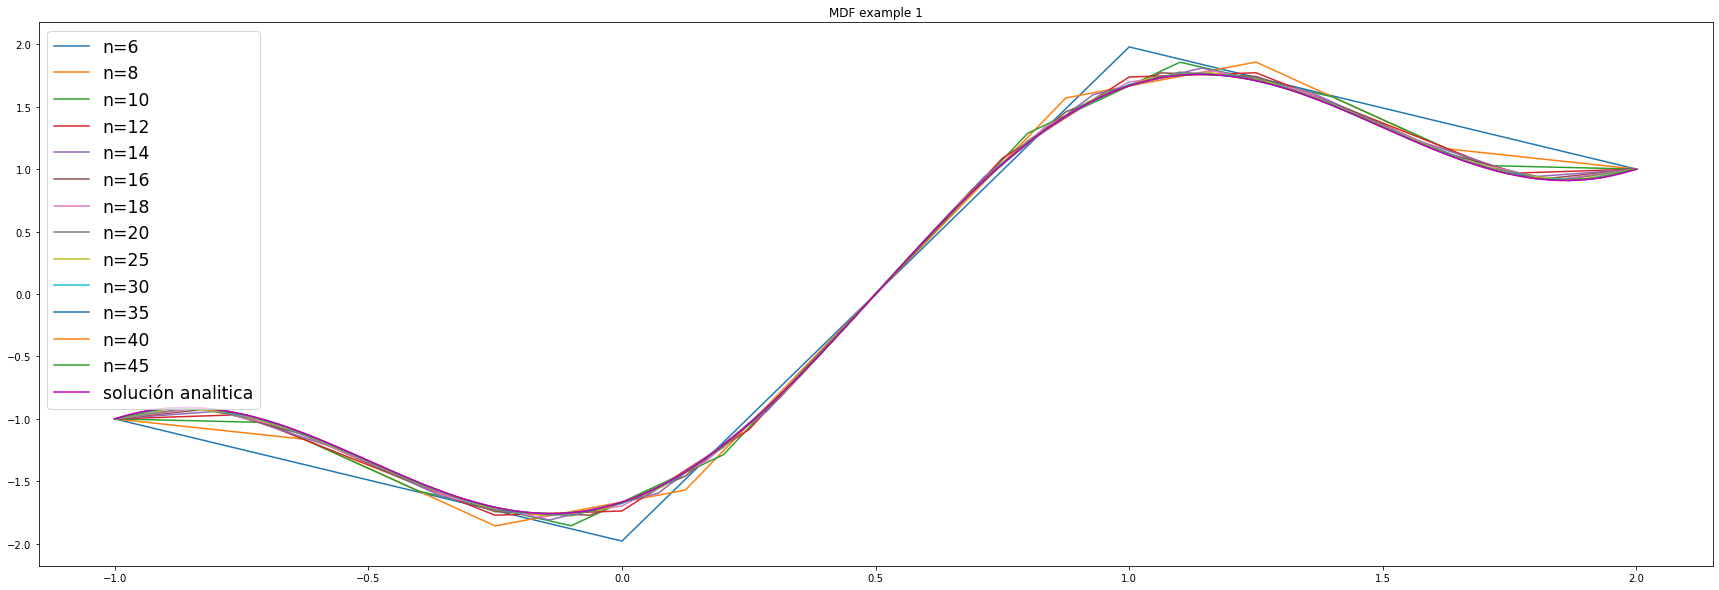

In [7]:
plt.figure(figsize=(30,10)) 

for i in range(0,50):
    a=0
    if i>4 and i<21 and i%2==0:
        a=i
    elif i>20 and i%5==0:
        a=i
    if a>0:
        malla_aux,h_aux=malla(a,xi1,xf1)
        faux=function_example1(a,u0,un,h_aux,malla_aux)
        Aaux= Amatrix(a-1)
        uaux=make_u(h_aux,Aaux,faux,u0,un)
        plt.plot(malla_aux,uaux,label='n='+str(a))
        if a==4 or a==8 or a==12 or a==18 or a==25:
            print('para la malla de', a, 'nodos se tiene que los  errores son \n',error_function(uaux,malla_aux))


plt.plot(inter,g_values,c='m',label='solución analitica')
plt.legend(fontsize='xx-large')
plt.title('MDF example 1')
save_results_to = '/home/daniela/'
plt.savefig(save_results_to + 'g4.png', dpi = 300)
plt.show()

# Simulación 2

**_Paso 1: Generar una malla homogénea al dominio_**

*u''(x)+u(x)=8cos(2 x),    x se mueve en  [0,10], y(0)=0 y(10)=18.26**

**obs: notemos que la solución analitica del problema anterior viene dado por y(x)=2xsin(2x)**

In [8]:
# Generar una malla homogénea al dominio 
nn2=5
xi=0
yi=0
xf=10
yf=18.26
mm2,hh2=malla(nn2,xi,xf)

**_Paso 2:Crear el sistema algebraico dado por_**

In [9]:
AA= 4*(hh2**2)*np.identity(nn2-1)+Amatrix(nn2-1) #variacion respecto a la simulación 1

def function_example2(n,u0,un,h,malla):
    x=symbols('x')
    f_vector1=[]
    for i in malla[1:n]:
        x=i  
        f= 8*np.cos(2*x)
        if i==malla[1]:
            f_vector1.append(f-(u0/(h**2)))
        elif i==malla[n-1]:
            f_vector1.append(f-(un/(h**2)))
        else:
            f_vector1.append(f)
    return f_vector1

ff=function_example2(nn2,yi,yf,hh2,mm2)

**_Paso 3:Resolver el sistema**

In [10]:
uu=make_u(hh2,AA,ff,yi,yf)

### Grafica de resultados

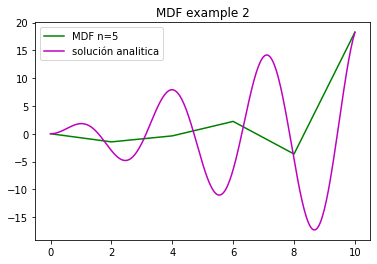

In [11]:
inter=np.linspace(xi,xf,300)
g_values=[]
for i in inter:
    x=i
    g=2*x*sin(2*x)
    g_values.append(g)

plt.plot(mm2,uu,c='g',label='MDF n=5')
plt.plot(inter,g_values,c='m',label='solución analitica')
plt.legend()
plt.title('MDF example 2')
plt.show()

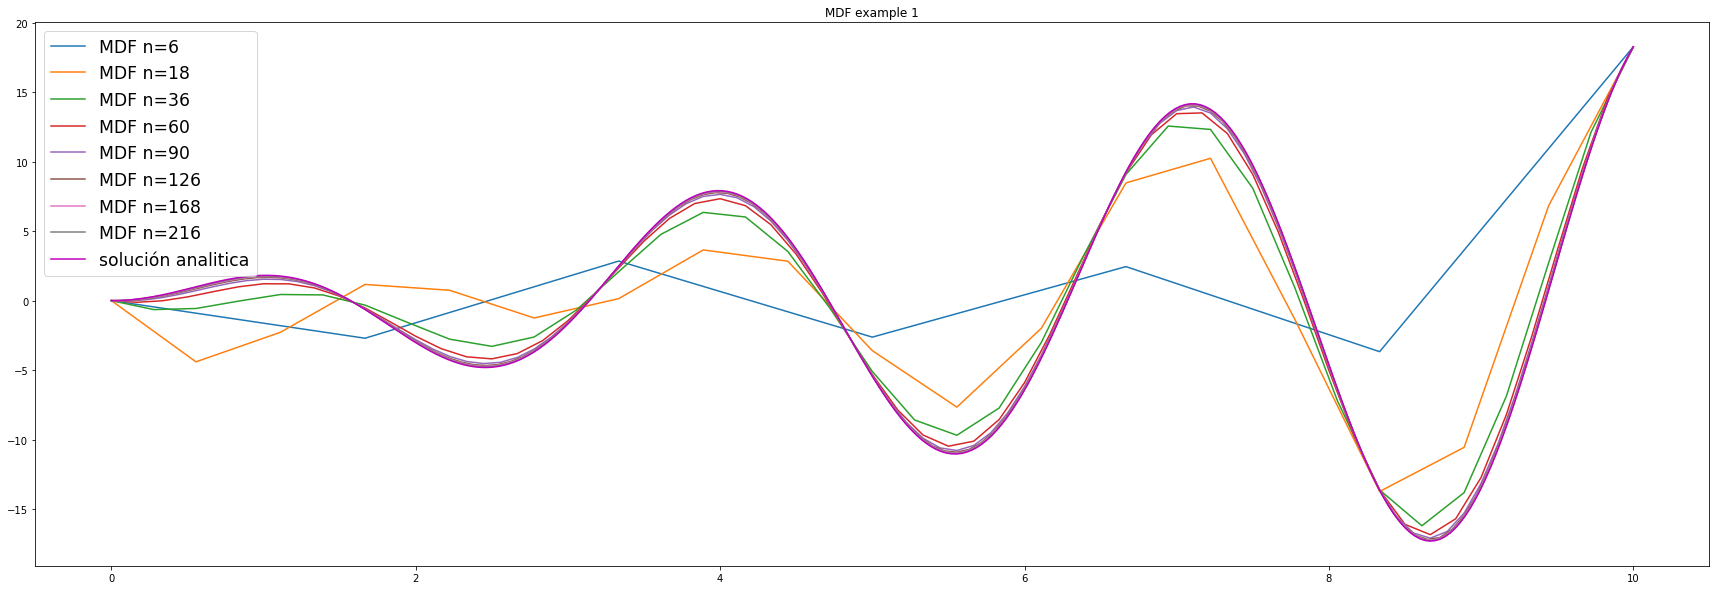

In [12]:
#ahora para varios nodos
plt.figure(figsize=(30,10)) 


for i in range(1,9):
    nnaux=3*i*(i+1)
    mmaux,hhaux=malla(nnaux,xi,xf)
    AAaux= 4*(hhaux**2)*np.identity(nnaux-1)+  Amatrix(nnaux-1)
    ffaux=function_example2(nnaux,yi,yf,hhaux,mmaux)
    uuaux=make_u(hhaux,AAaux,ffaux,yi,yf)
    plt.plot(mmaux,uuaux,label='MDF n='+str(nnaux))


plt.plot(inter,g_values,c='m',label='solución analitica')
plt.legend(fontsize='xx-large')
plt.title('MDF example 1')
save_results_to = '/home/daniela/'
plt.savefig(save_results_to + 'g6.png', dpi = 300)
plt.show()